In [1]:
import pandas as pd 
import numpy as np 
from utils import *

In [2]:
pos = pd.read_csv(r"C:\Users\Admin\Downloads\final_dataprep\dseb63_final_project_DP_dataset\dseb63_POS_CASH_balance.csv")
app_train = pd.read_csv(r"C:\Users\Admin\Downloads\final_dataprep\dseb63_final_project_DP_dataset\dseb63_application_train.csv")

## Khảo sát tổng quan dữ liệu

,Attribute,Value
0,Shape,Rows: 8543375 Columns: 8
1,Numerical Columns,SK_ID_PREV MONTHS_BALANCE CNT_INSTALMENT CNT_INSTALMENT_FUTURE SK_DPD SK_DPD_DEF SK_ID_CURR
2,Categorical Columns,NAME_CONTRACT_STATUS
3,Data Types,SK_ID_PREV: int64 MONTHS_BALANCE: int64 CNT_INSTALMENT: float64 CNT_INSTALMENT_FUTURE: float64 NAME_CONTRACT_STATUS: object SK_DPD: int64 SK_DPD_DEF: int64 SK_ID_CURR: int64


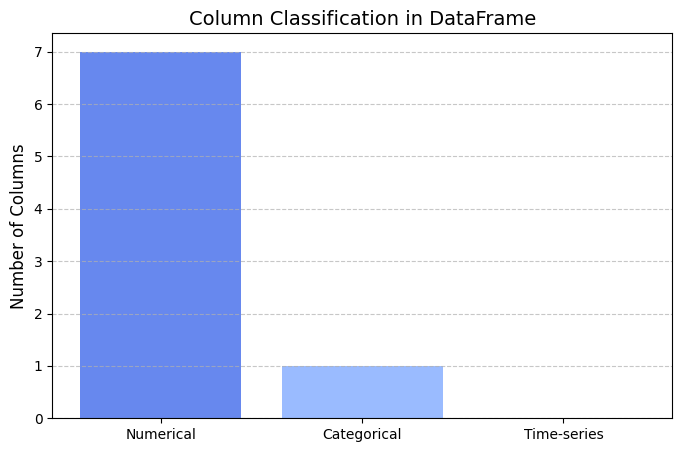

In [3]:
display_dataframe_info(pos)

The POS_CASH Balance in the Home Credit Risk dataset tracks the status of previous loans taken by a client through point-of-sale (POS) or cash loan channels. Each record represents a monthly snapshot of the loan's repayment history and current status. Key features include:

- SK_ID_CURR: Client's unique identifier.
- SK_ID_PREV: Previous loan's unique identifier.
- MONTHS_BALANCE: Months since the last due date. Negative values indicate past months.
- CNT_INSTALMENT: Number of installments planned for the loan.
- CNT_INSTALMENT_FUTURE: Remaining installments at the current record's date.
- NAME_CONTRACT_STATUS: Current loan status (e.g., Active, Completed, Canceled).
- SK_DPD: Days past due; shows delay in payment.
- SK_DPD_DEF: Days past due with a legal demand for payment.

This table provides detailed insight into a client's historical loan performance, which helps assess credit risk and repayment behavior.

,Column,Missing Count,Missing Percentage (%)
2,CNT_INSTALMENT,21863,0.26%
3,CNT_INSTALMENT_FUTURE,21878,0.26%
0,SK_ID_PREV,0,0.00%
1,MONTHS_BALANCE,0,0.00%
4,NAME_CONTRACT_STATUS,0,0.00%
5,SK_DPD,0,0.00%
6,SK_DPD_DEF,0,0.00%
7,SK_ID_CURR,0,0.00%


c:\Users\Admin\Desktop\Final data prep\EDA\utils.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


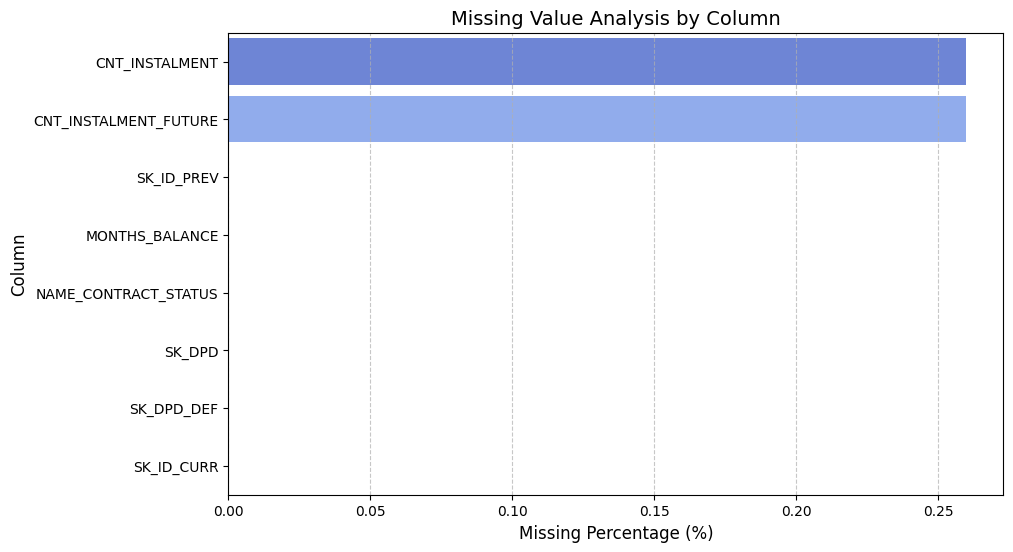

In [4]:
analyze_missing_values(pos)

Within the POS_CASH_balance dataset, only two columns exhibit missing values: those tracking installment counts and loan duration. Critically, these NaN entries represent an exceptionally low proportion—merely 0.26% of the total data—rendering the missing values statistically insignificant and unlikely to substantially impact subsequent analysis or risk modeling.

In [5]:
basic_statistics_summary(pos)

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,8543375.00,1903488.60,535938.73,1000001.00,1434475.00,1896878.00,2369096.00,2843499.00
MONTHS_BALANCE,8543375.00,-34.95,26.05,-96.00,-54.00,-28.00,-13.00,-1.00
CNT_INSTALMENT,8521512.00,17.03,12.00,1.00,10.00,12.00,24.00,84.00
CNT_INSTALMENT_FUTURE,8521497.00,10.47,11.14,0.00,3.00,7.00,14.00,84.00
SK_DPD,8543375.00,11.90,134.03,0.00,0.00,0.00,0.00,4231.00
SK_DPD_DEF,8543375.00,0.58,30.42,0.00,0.00,0.00,0.00,3373.00
SK_ID_CURR,8543375.00,153535.56,88716.61,0.00,76622.00,153315.00,230293.00,307510.00


## Phase 2

In [6]:
target_pos = merge_target(pos, app_train)

Successfully merged 'TARGET' column into the data.


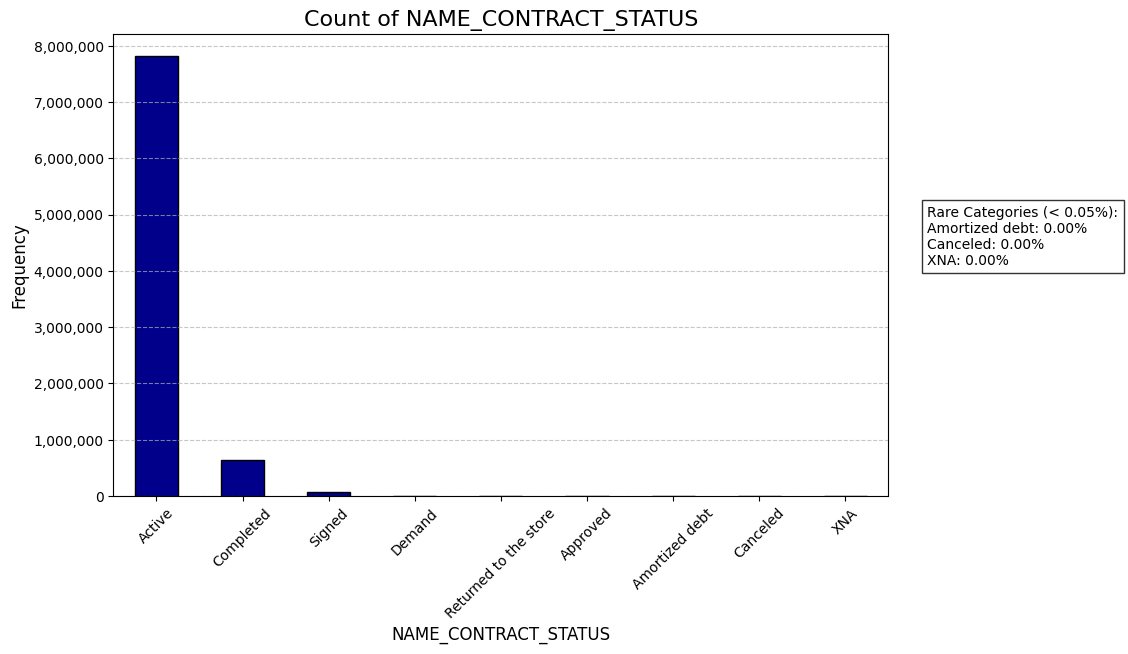

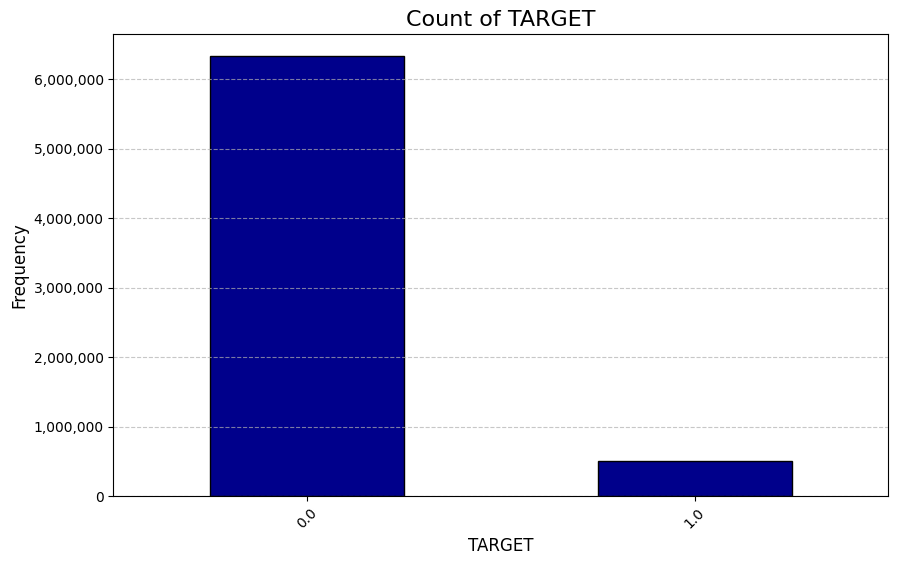

In [7]:
visualize_cate_with_rare_and_binary(target_pos, 0.05)

From the first chart, the predominant status is "Active", with over 7 million occurrences, indicating the majority of loans or contracts are currently ongoing. The next most frequent status is "Completed", with around 1 million occurrences, suggesting a significant number of contracts have been successfully finalized. The remaining statuses, such as "Canceled" and "Approved", have much lower frequencies, ranging from a few thousand to a few hundred thousand occurrences. This visualization offers valuable insights into the overall state of the loan or contract portfolio.


=== Outlier Detection and Handling ===


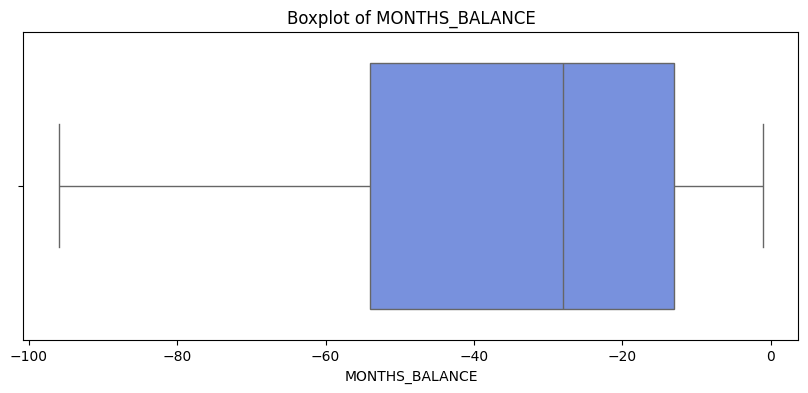

No outliers detected in column MONTHS_BALANCE.


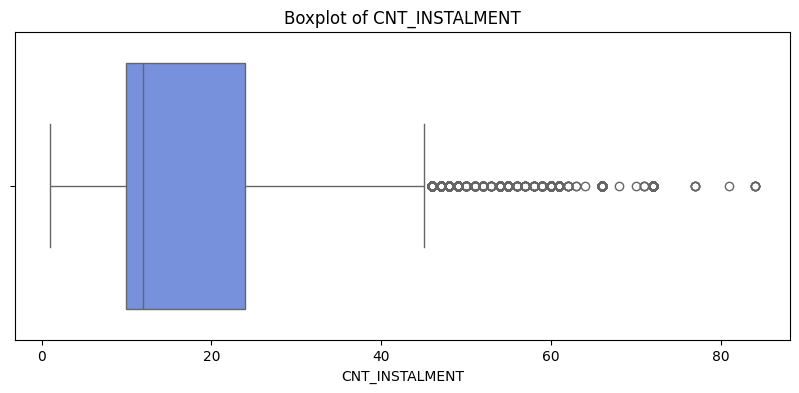

Outliers detected in column CNT_INSTALMENT: 186030 rows


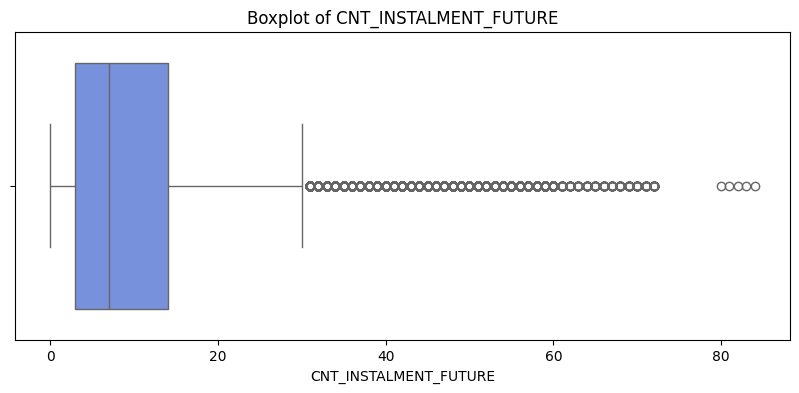

Outliers detected in column CNT_INSTALMENT_FUTURE: 222741 rows


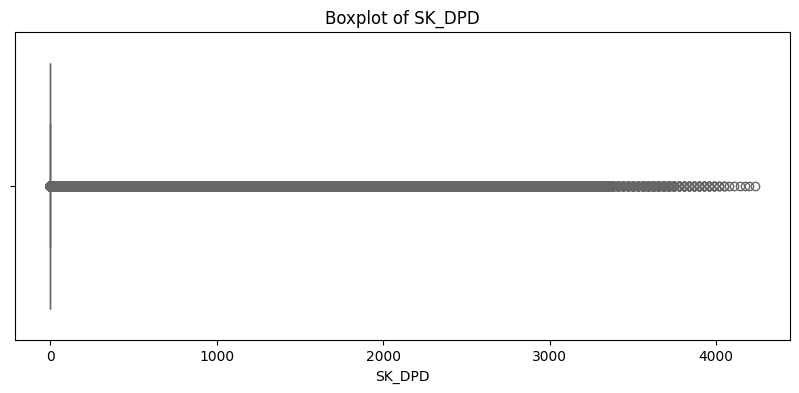

Outliers detected in column SK_DPD: 72771 rows


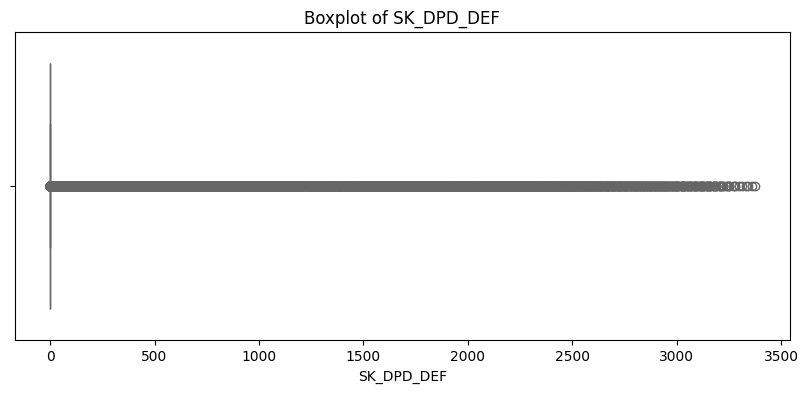

Outliers detected in column SK_DPD_DEF: 3615 rows


In [8]:
checking_outlier(target_pos, target = 'TARGET')

The boxplot of MONTHS_BALANCE reveals a single outlier around -80 on the axis. Similarly, the CNT_INSTALMENT boxplot shows multiple outliers between 60 and 80, with 186,030 rows identified as outliers in this column. Additionally, the CNT_INSTALMENT_FUTURE boxplot highlights a single outlier near 80 on the axis.

The SK_DPD and SK_DPD_DEF columns appear to have numeric values that may contain outliers, such as higher values like 384, 354, and 505. Further analysis would be required to confirm the presence of outliers in these columns and determine the appropriate methods to handle them.

Overall, the provided information highlights the need for more detailed analysis of the data distributions to identify and address any potential outliers across the different columns in the dataset.


=== Checking for Imbalanced Columns ===
Column 'NAME_CONTRACT_STATUS' is imbalanced:
NAME_CONTRACT_STATUS
Active                   9.151626e-01
Completed                7.431162e-02
Signed                   8.734838e-03
Demand                   7.151740e-04
Returned to the store    5.373755e-04
Approved                 4.940670e-04
Amortized debt           4.272316e-05
Canceled                 1.404597e-06
XNA                      2.340995e-07
Name: proportion, dtype: float64


c:\Users\Admin\Desktop\Final data prep\EDA\utils.py:291: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.index, y=top_features.values, palette="coolwarm")


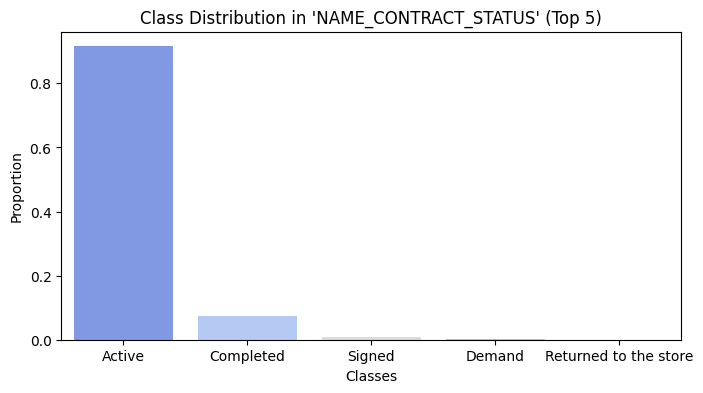

In [9]:
checking_imbalance(target_pos, target = 'TARGET')

The dataset shows moderate imbalance in NAME_CONTRACT_STATUS with most data points belong to Active


=== Low-Variance Feature Detection ===


c:\Users\Admin\Desktop\Final data prep\EDA\utils.py:322: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=numeric_cols, y=variances, palette="viridis")


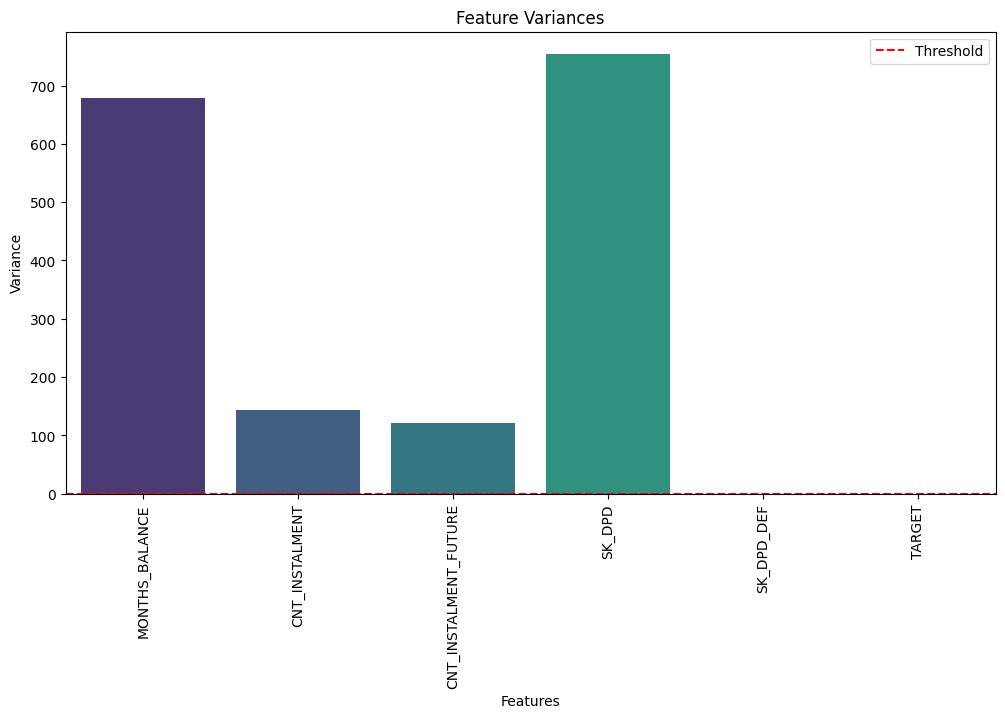

No low-variance columns detected.


[]

In [10]:
low_variance(target_pos)

This plot shows the variance of numerical features, with the red dashed line indicating the threshold for low variance. Features below the threshold may have minimal impact on the model and can be considered for removal. High-variance features such as MONTHS_BALANCE and SK_DPD capture significant variability and are likely more informative. Moderate-variance features like CNT_INSTALMENT remain above the threshold. Care should be taken when assessing features like TARGET, as it is typically the dependent variable and may not be suitable for this analysis.

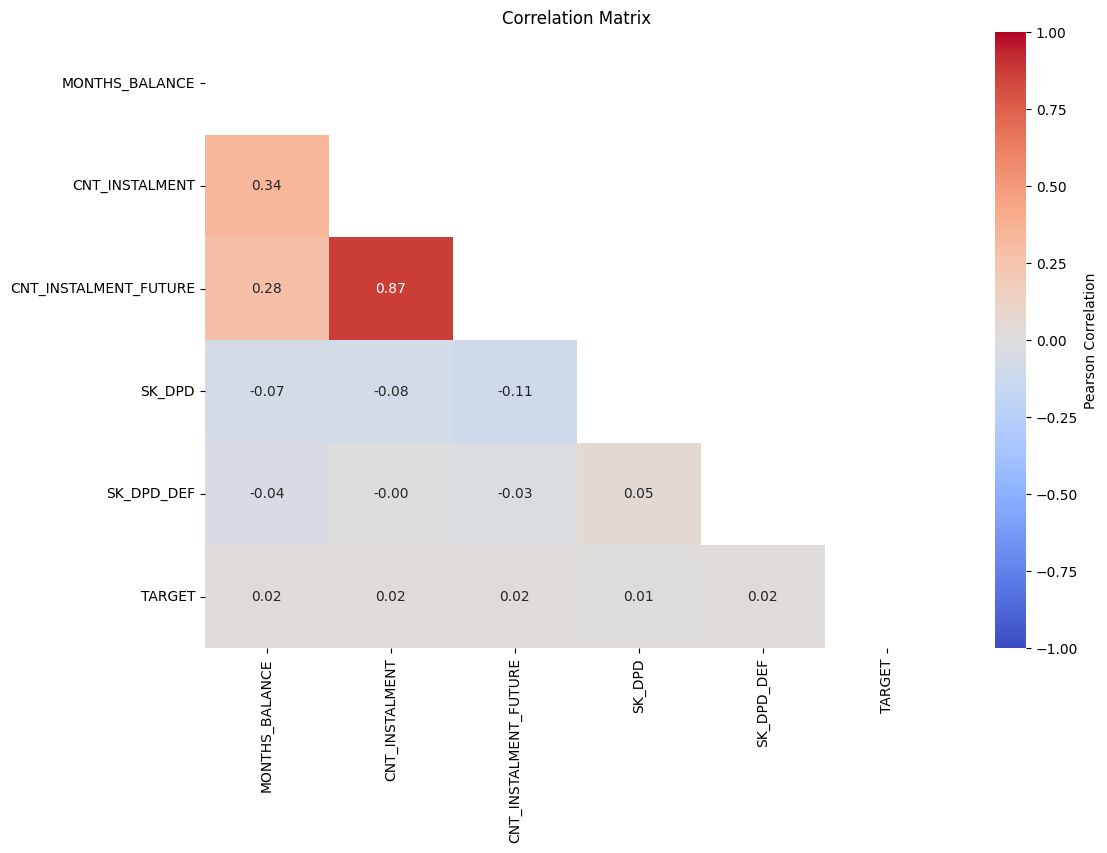


Strong correlations above threshold:
       Variable 1             Variable 2  Correlation
5  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE     0.873977


In [11]:
correlation_matrix(target_pos)

The instalment-related variables, CNT_INSTALMENT and CNT_INSTALMENT_FUTURE, show moderate positive correlations with each other 0.87.

MONTHS_BALANCE have second highest correlation in the chart with both CNT_INSTALMENT and CNT_INSTALMENT_FUTURE

The target variable, TARGET, exhibits weak positive correlations with several variables, including MONTHS_BALANCE, CNT_INSTALMENT, CNT_INSTALMENT_FUTURE, and SK_DPD_DEF, suggesting they may have some predictive power. 

Overall, the correlation matrix highlights the varying degrees of linear relationships between the different features, which can inform further data exploration and model development.


Generating pairplot for numerical variables...


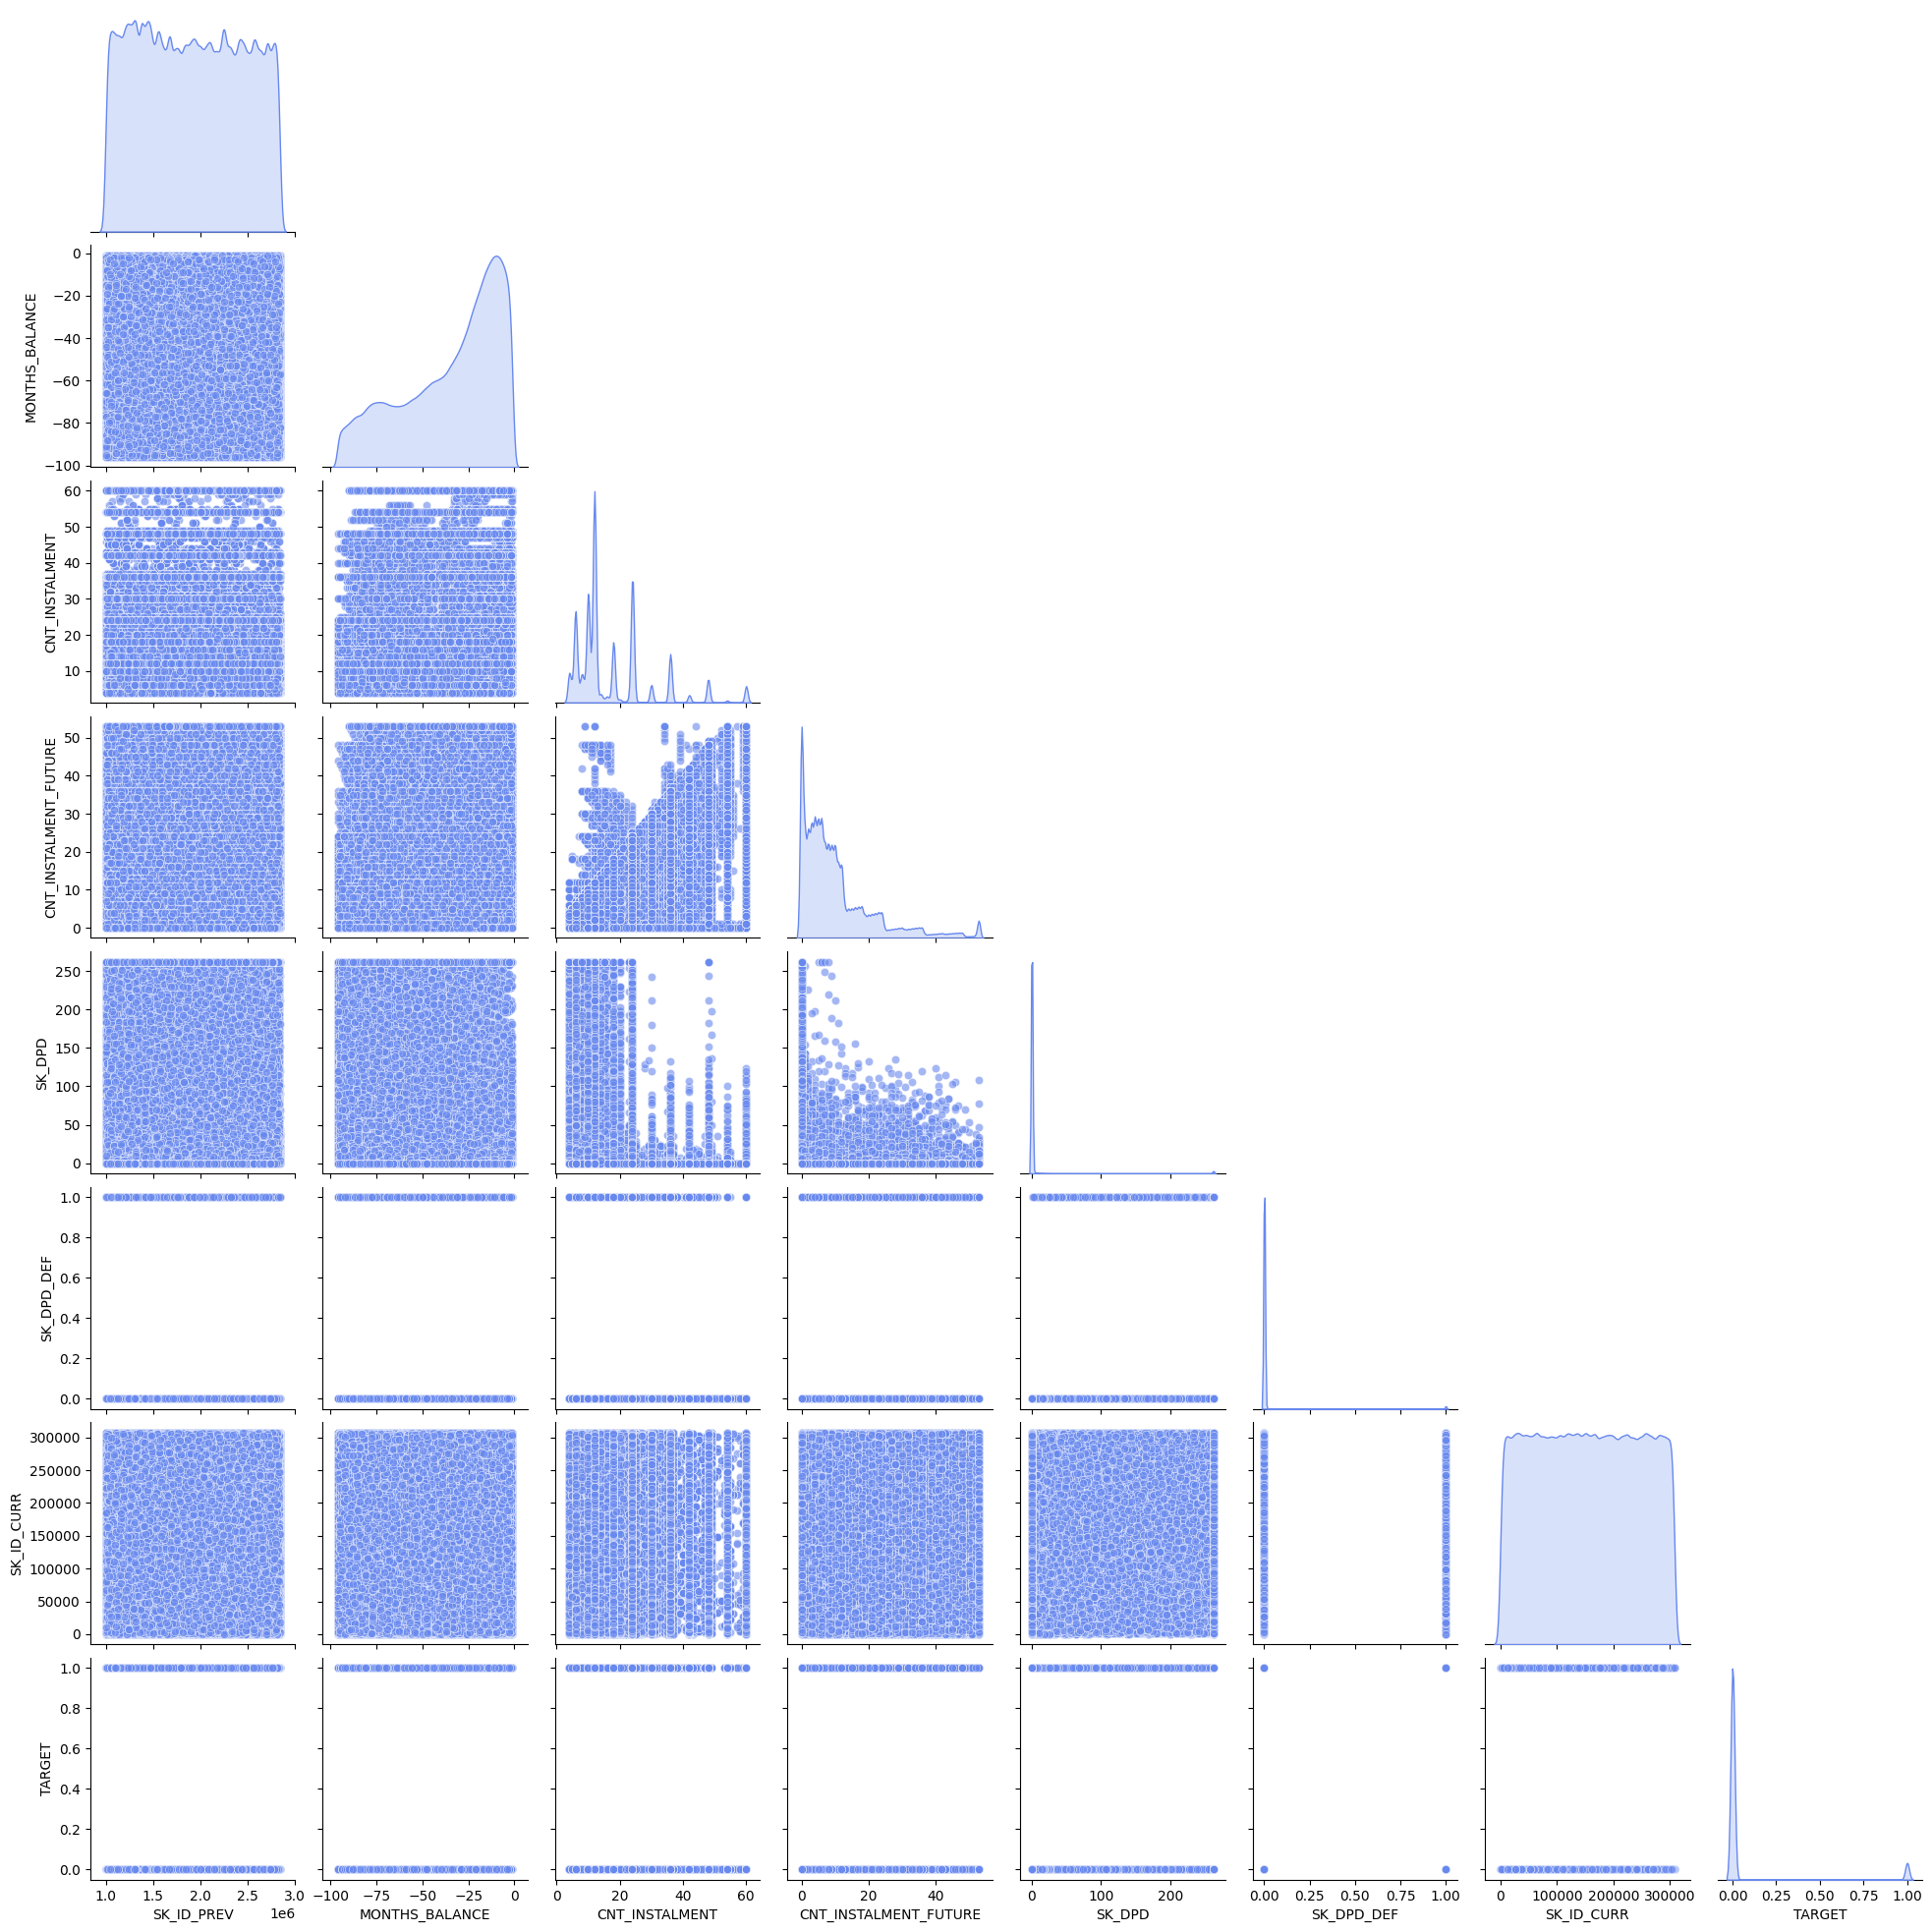

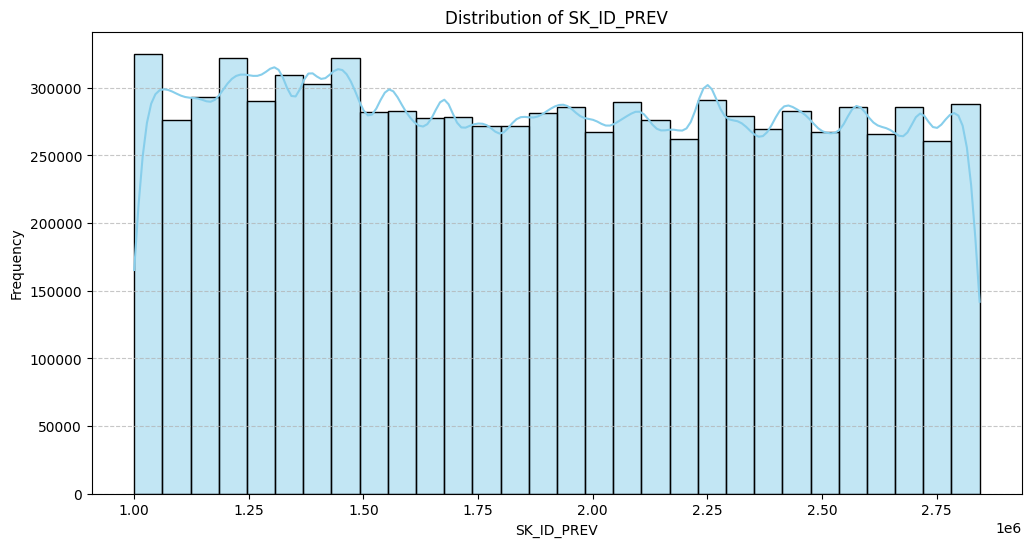

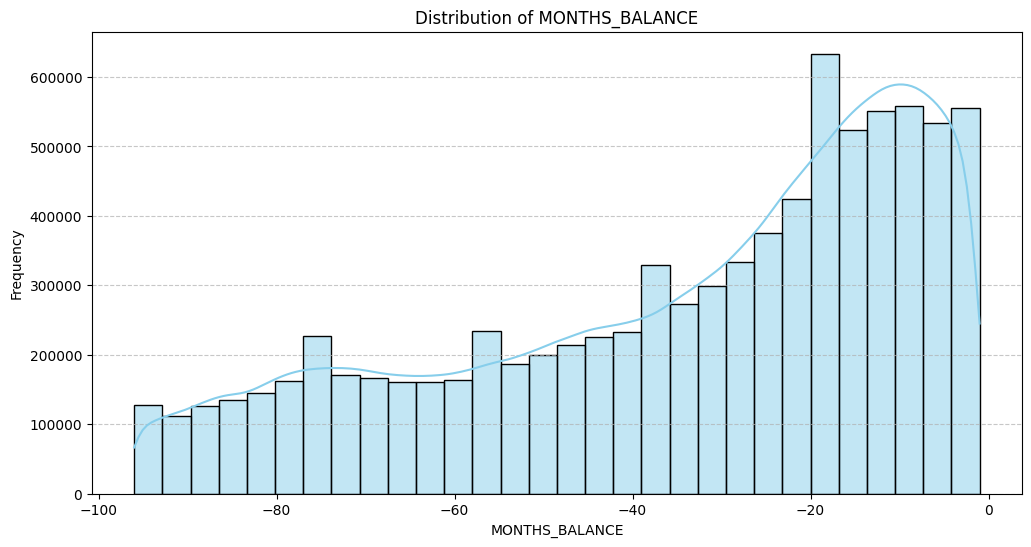

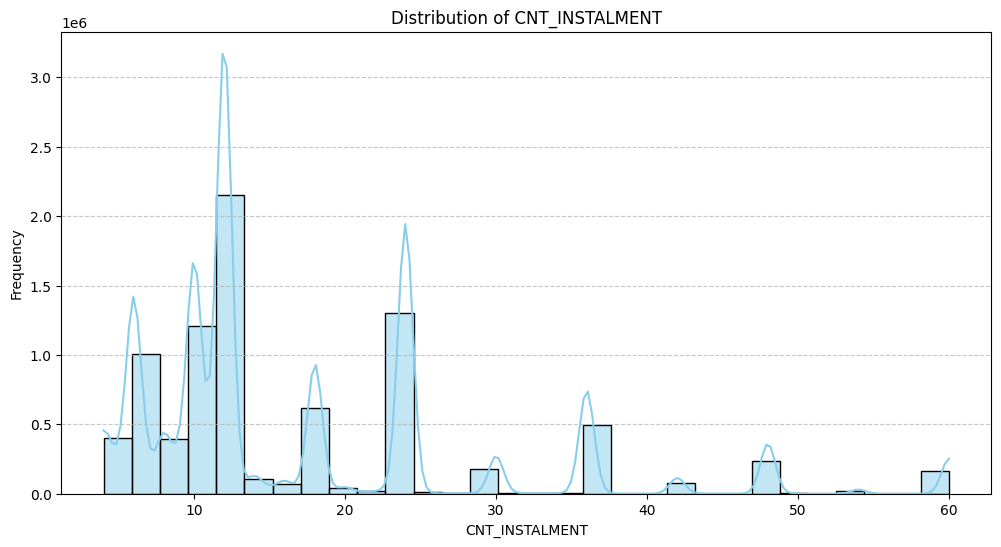

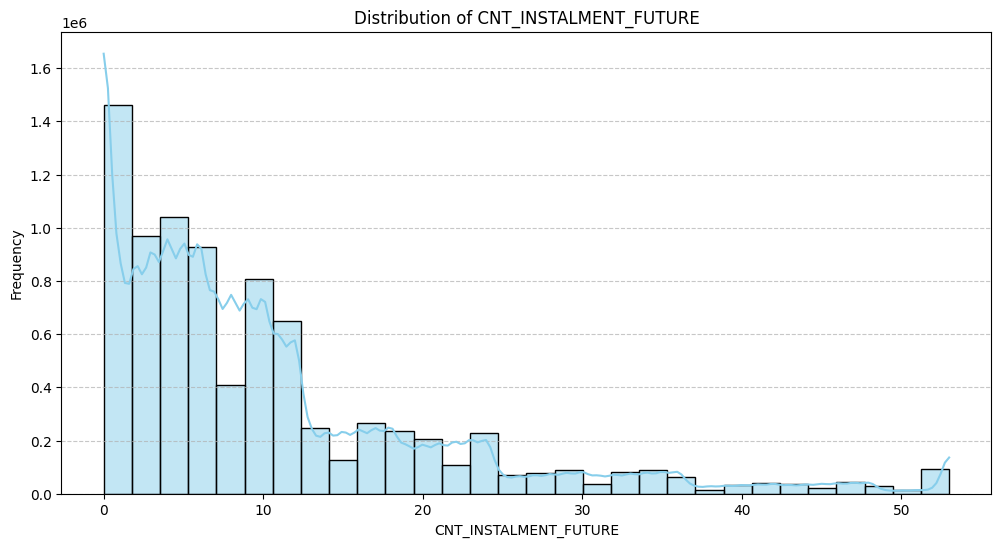

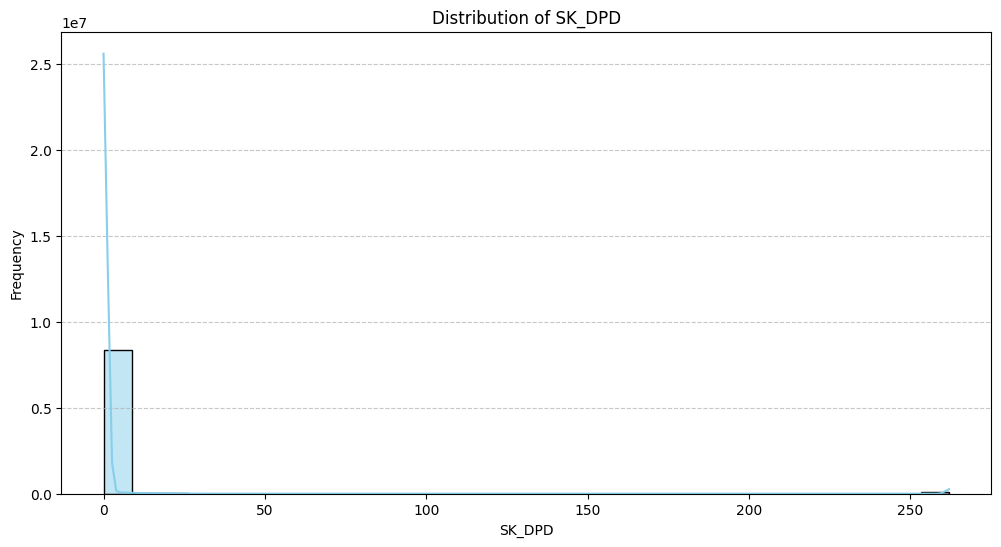

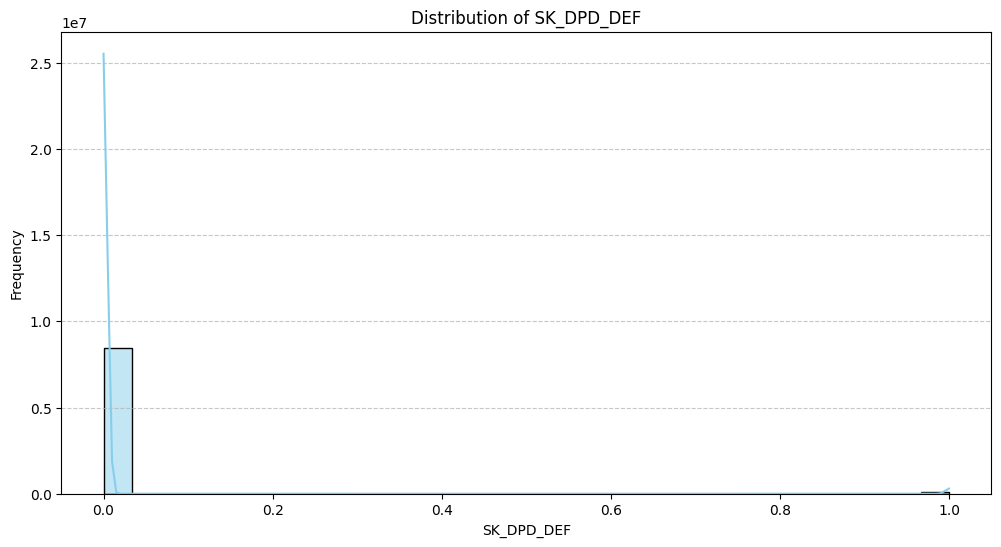

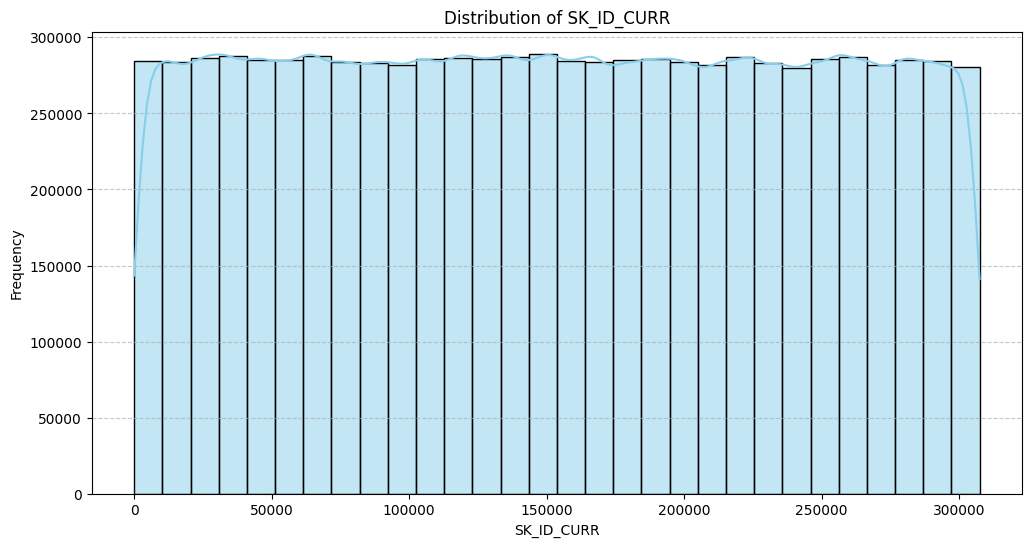

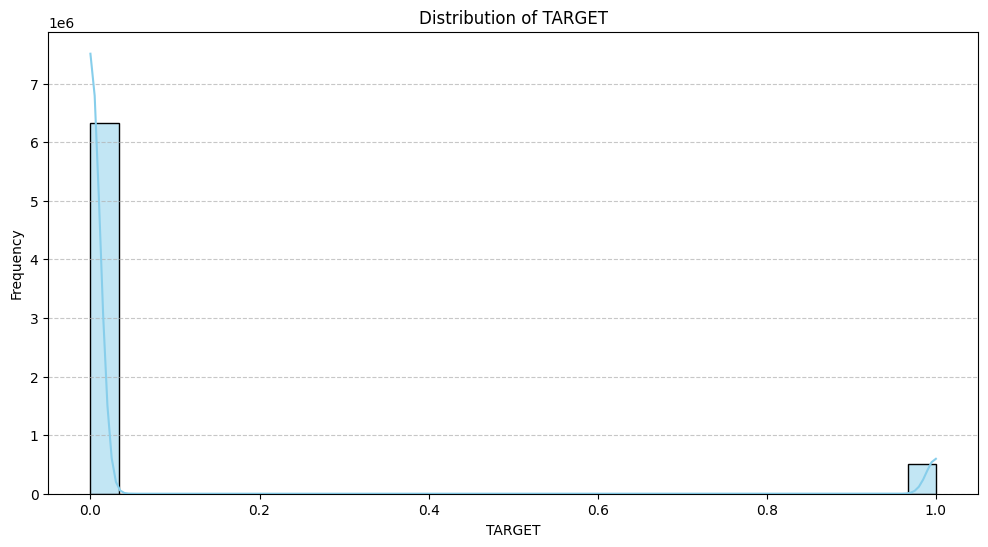

In [12]:
analyze_numeric_relationships(target_pos)

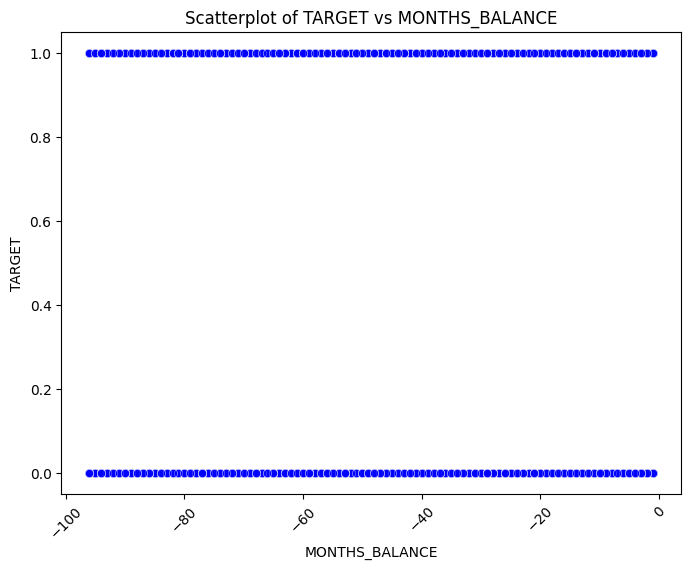

Insufficient data in one of the groups for MONTHS_BALANCE. Skipping...


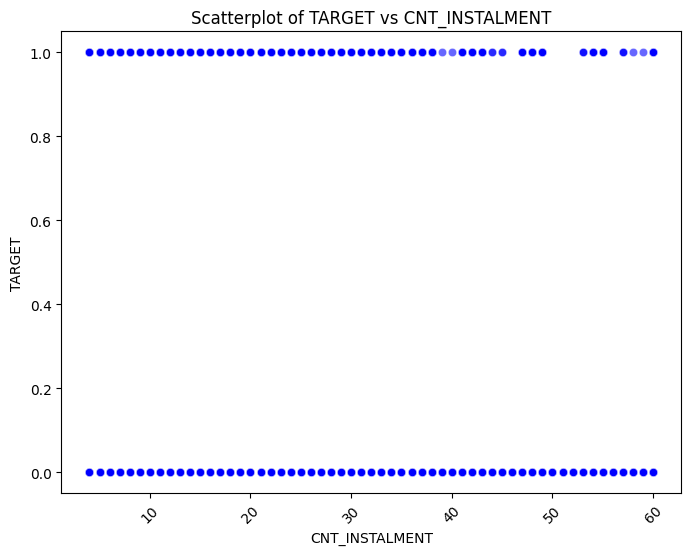

Insufficient data in one of the groups for CNT_INSTALMENT. Skipping...


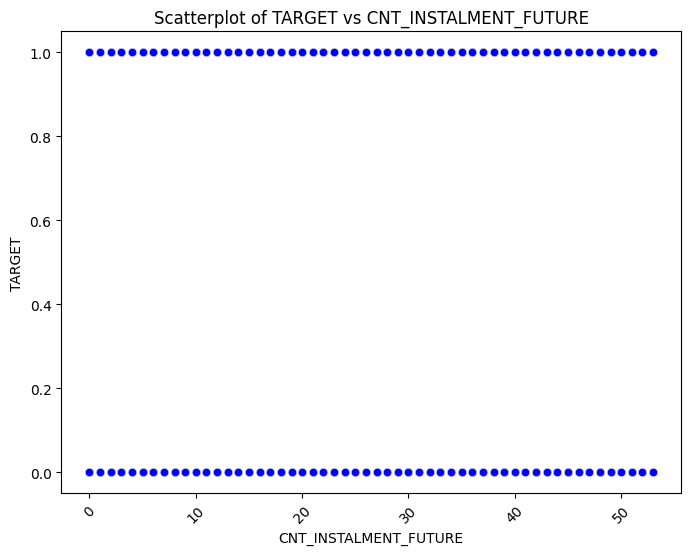

Insufficient data in one of the groups for CNT_INSTALMENT_FUTURE. Skipping...


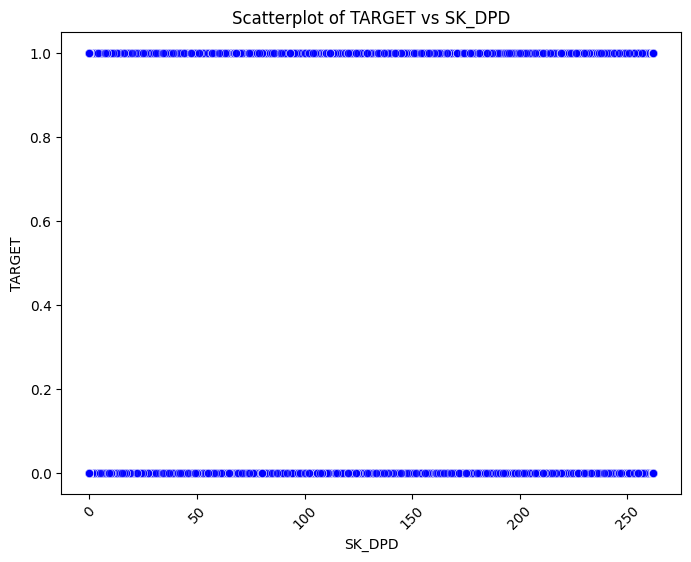

Insufficient data in one of the groups for SK_DPD. Skipping...


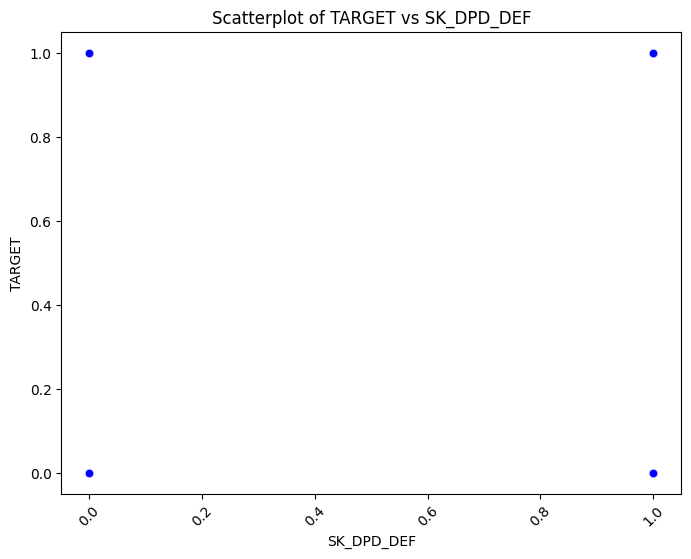

Insufficient data in one of the groups for SK_DPD_DEF. Skipping...


c:\Users\Admin\Desktop\Final data prep\EDA\utils.py:465: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
c:\Users\Admin\Desktop\Final data prep\EDA\utils.py:465: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


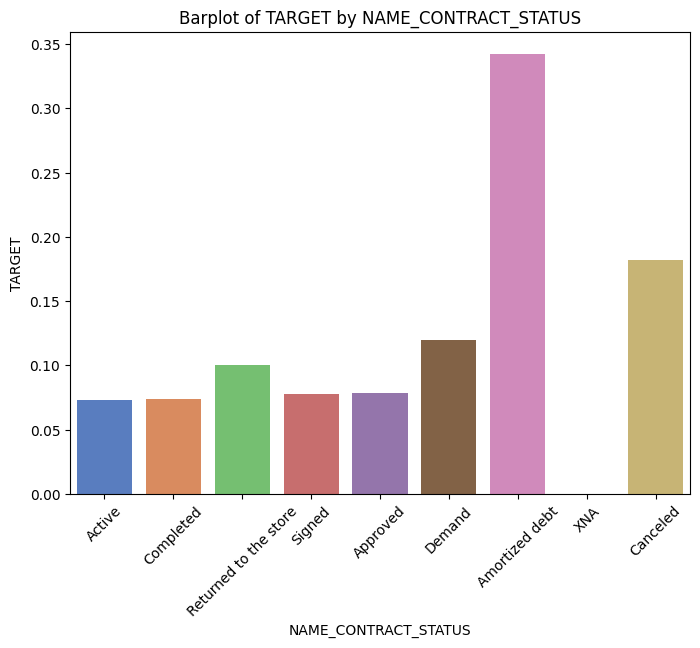

Chi-square Test Results for NAME_CONTRACT_STATUS vs TARGET: Chi2: 607.7188, p-value: 0.0000
There is a statistically significant relationship.



In [13]:
analyze_target_relationship(target_pos, target_col = 'TARGET', group_cols = ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'])

Easy to see that NAME_CONTRACT_STATUS have great impact to TARGET 